In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [82]:
def smooth(y, window_size = 20 , algo = 'mv_mean'):

    if algo == 'mv_mean':
        mask = np.ones((window_size,))
        y_smth = np.convolve(y,mask/window_size, mode = 'valid')    
        return y_smth
    
def cut(x):
    if x >=0 and x<=1:
        return x


def plot_loss(df, same_figure = False, lbl =None, legend = None, logrithmic_scale = True, smoothing = True, cut_values = False, ax=None):
    d = pd.DataFrame()
    cols = df.columns[1:]
    for col in cols:
        d = pd.concat([d,df[col]], axis=0)
        
    if not same_figure:
        plt.figure()
    
    z = d.values
    z = z.reshape(z.shape[0],)
    label = 'loss'
    if smoothing:
        w_size = 200
        z = smooth(z, window_size=w_size)
        
    if logrithmic_scale:
        z = np.log10(z)
        label = 'logarithmic loss (base 10)'
        
    ax.plot(z, label=lbl) 
    plt.xlabel('steps')
    plt.ylabel(label)
    
    axes = plt.gca()
    if not logrithmic_scale:
        axes.set_ylim([0.0,None])
        if cut_values:
            if not logrithmic_scale:
                axes.set_ylim([0.0,1.75])
    else:
        axes.set_ylim([-2.0,None])
        if cut_values:
            axes.set_ylim([-3.0,3.0])
        
    if legend:
        leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.29),
          ncol=4, fancybox=True, shadow=False, borderaxespad=0.)

        
def read_folder(fname):
    sub_folders = glob.glob(fname)
    return sub_folders

def read_data(paths):
    data = []
    for file_path in paths:
        tr_loss = pd.read_csv(glob.glob(file_path+'/train_losses*')[0])
        tst_loss = pd.read_csv(glob.glob(file_path+'/test_losses*')[0])

        ytr = pd.read_csv(file_path+'/train_labels.csv')
        ytr_ = pd.read_csv(file_path+'/train_outs.csv')

        ytst = pd.read_csv(file_path+'/test_labels.csv')
        ytst_ = pd.read_csv(file_path+'/test_outs.csv')[498000:]

        data.append((file_path,tr_loss, tst_loss, ytr,ytr_, ytst, ytst_))
        
    return data


def visualize(data):

##################### logrithmic plots.

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
  
    for d in data:
        label = d[0].split("/")[1]+"_"+d[0].split("/")[2]
        plot_loss(d[1], same_figure = True, lbl=label, legend= True,logrithmic_scale = True, 
                  smoothing = True, cut_values = False, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/train_'+'_log'+'.png', dpi=300)
    
    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
    
    for d in data:
        label = d[0].split("/")[1]+"_"+d[0].split("/")[2]
        plot_loss(d[2], same_figure = True, lbl=label, legend=True, logrithmic_scale = True, 
                  smoothing = True, cut_values = False, ax=ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/test_'+'_log'+'.png', dpi=300)
# ************************** With cut

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for d in data:
        label = d[0].split("/")[1]+"_"+d[0].split("/")[2]
        plot_loss(d[1], same_figure = True, lbl=label, legend= True, logrithmic_scale = True, 
                  smoothing = True, cut_values = True, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/train_'+'_log_cut'+'.png', dpi=300)
    
    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
        
    
    for d in data:
        label = d[0].split("/")[1]+"_"+d[0].split("/")[2]
        plot_loss(d[2], same_figure = True, lbl=label, legend=True,logrithmic_scale = True, 
                  smoothing = True, cut_values = True,ax=ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/test_'+'_log_cut'+'.png', dpi=300)
##################### Linear plots.

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
    
    for d in data:
        label = d[0].split("/")[1]+"_"+d[0].split("/")[2]
        plot_loss(d[1], same_figure = True, lbl=label, legend= True, logrithmic_scale = False, 
                  smoothing = True, cut_values=False, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/train_'+'_linear'+'.png', dpi=300)
    

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for d in data:
        label = d[0].split("/")[1]+"_"+ d[0].split("/")[2]
        plot_loss(d[2], same_figure = True, lbl=label, legend=True, logrithmic_scale = False, 
                  smoothing = True, cut_values = False, ax =ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/test_'+'_linear'+'.png', dpi=300)

#********************* With cut

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for d in data:
        label = d[0].split("/")[1]+"_"+ d[0].split("/")[2]
        print(label)
        plot_loss(d[1], same_figure = True, lbl=label, legend= True, logrithmic_scale = False, 
                  smoothing = True, cut_values=True, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/train_'+'_linear_cut'+'.png', dpi=300)

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for d in data:
        label = d[0].split("/")[1]+"_"+ d[0].split("/")[2]
        plot_loss(d[2], same_figure = True, lbl=label, legend=True, logrithmic_scale = False, 
                  smoothing = True, cut_values = True, ax=ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+d[0].split("/")[1]+'/test_'+'_linear_cut'+'.png', dpi=300)
    
    
    return 0
    

classical_0.0
classical_0.9
classical_0.8
classical_0.4
classical_0.05
classical_0.2
classical_0.1
classical_0.7
classical_0.3
classical_0.6
classical_0.5


0

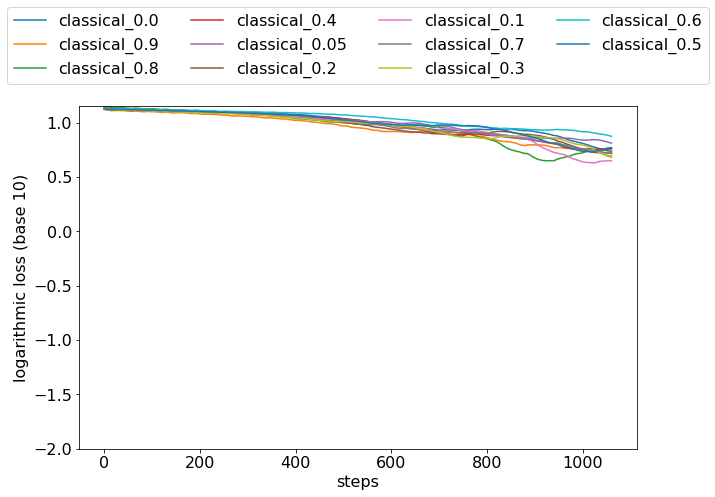

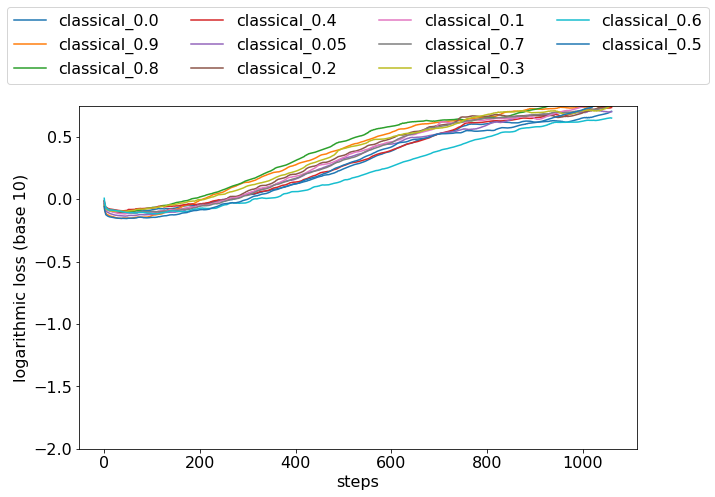

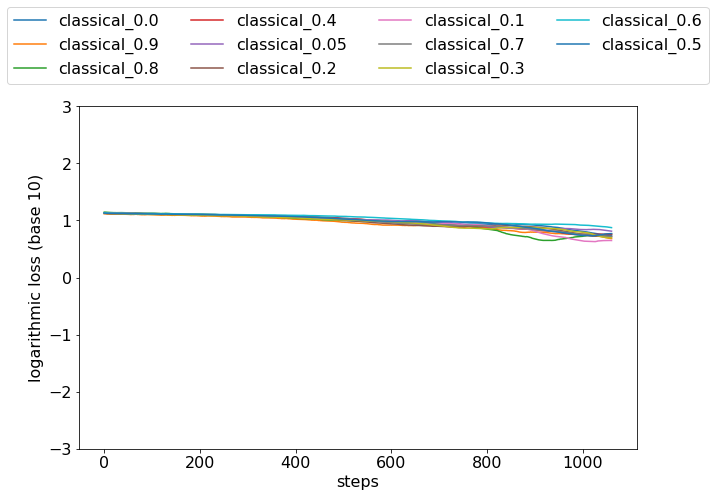

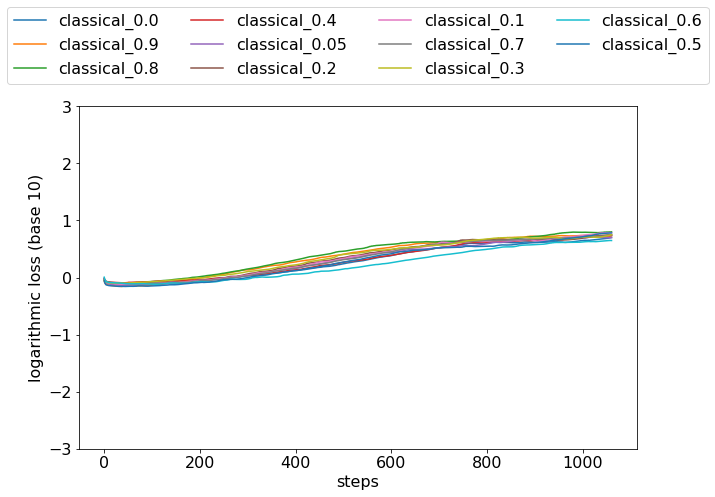

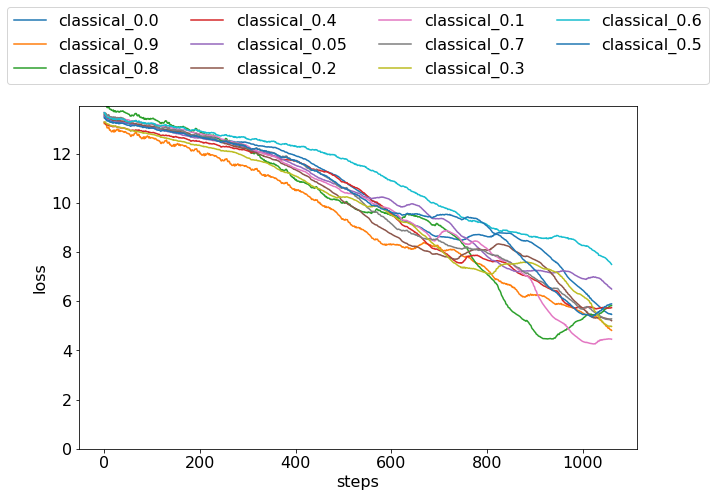

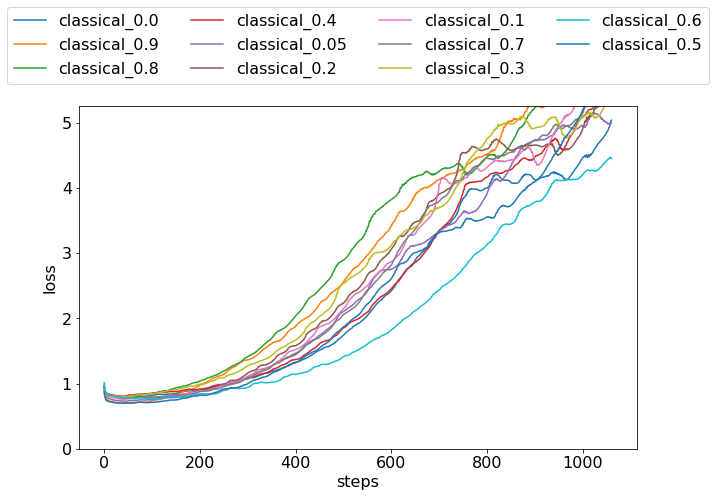

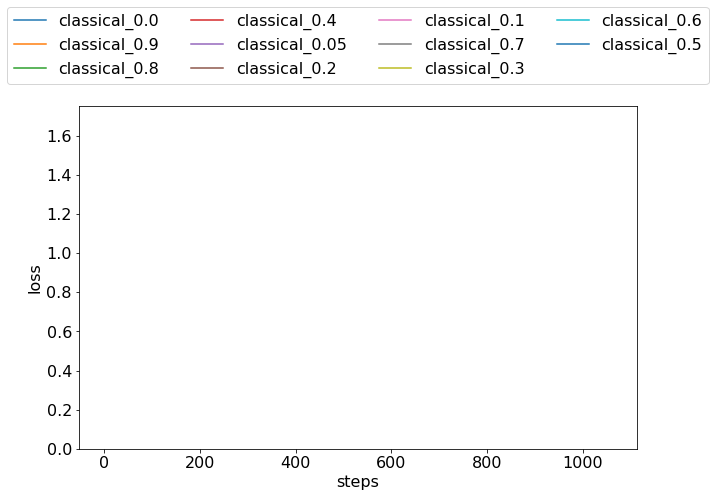

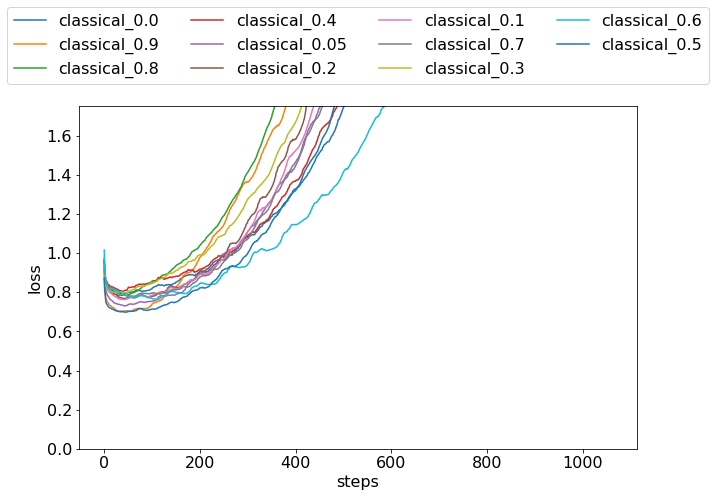

In [83]:
path = "./classical/*"
subfolders = read_folder(path)
data = read_data(subfolders)
visualize(data)